# SheHacks 2020: Pandas Workshop

### Introduction

Pandas is a popular python library providing high-performance, easy-to-use data structures and data analysis tools.  It is inspired by R's `data.frame` and bears many resemblences to SQL and other tabular data tools.

This workshop will serve as a basic introduction to pandas' capabilities.  For more, I encourage you to read the docs, browse blog posts, and read questions and answers on stack overflow.

Pandas documentation: https://pandas.pydata.org/pandas-docs/version/1.0.0/index.html

A set of useful examples from Chris Albon: https://chrisalbon.com/

Stack overlow: https://stackoverflow.com/questions/tagged/pandas


### How To Install Pandas

Pandas relies on several other python libraries.  The easiest way to install pandas is to download the anaconda release of python.  **Be sure to download python 3.x since python 2.7 is no longer being maintained**.

Anaconda: https://www.anaconda.com/distribution/

If you already have a python installation with `pip`, you can install pandas with

`pip install pandas`


### What You Will Learn

This will be a very low level workshop intented to get you comfortable working with dataframes.  In particular, I'm going to focus on the basics but will show you some other things pandas is capable of.  I'll do my best to follow the Pareto Rule of 80% simple and useful things, 20% cool things that you can reference should you need them.

Here is a rough schedule:

* Loading data into python with pandas

* Working with data

* Summarizing data

* Plotting data

* Saving data to file with pandas

Let's get started!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline

___
### Loading In Data

The easiest way to load data into pandas is with the `read_csv` function.  Pandas is capable of reading in a lot of different data formats.

pandas I/O functions: https://pandas.pydata.org/pandas-docs/version/1.0.0/user_guide/io.html

You can also read: SQL, JSON, HTML, and Excel files.

In [3]:
# dataframes are usually denoted by df, but you should think of a better name
df = pd.read_csv('2018_data.csv') #reads in a csv into python.

#Now you have data!  Let's see what it looks like
df.head() #Shows you the first 5 rows of your data


,apparentTemperature,humidity,precipType,wr,month,week_day,time
0,-23.27,0.83,NoPrecip,9.0,January,Tuesday,6
1,-23.27,0.83,NoPrecip,10.0,January,Tuesday,6
2,-24.22,0.83,NoPrecip,10.0,January,Tuesday,7
3,-24.22,0.83,NoPrecip,7.0,January,Tuesday,7
4,-19.47,0.85,NoPrecip,18.0,January,Tuesday,8


___
### Working With Data

There may come a time when you just need to work with a single column or a single row.  There are a few ways to go about doing this in pandas.

The main tools for this part are the `loc` and `iloc` methods.  They allow you to slice your dataframe much like you would slice an array.

`loc` docs: https://pandas.pydata.org/pandas-docs/version/1.0.0/reference/api/pandas.DataFrame.loc.html?highlight=loc#pandas.DataFrame.loc

`iloc` docs: https://pandas.pydata.org/pandas-docs/version/1.0.0/reference/api/pandas.DataFrame.iloc.html?highlight=iloc#pandas.DataFrame.iloc

#### Getting A Column

1) `df['column_name']` -- Extracts the column named `'column_name'` and returns a Pandas Series. 

2) `df.column_name` -- Does the same as above.  Can only be used when your column name does not have any spaces or special characters.

3) `df.loc[:, 'column_name'] -- Equivalent to method 1).

4) `df.iloc[;, column_number]` -- Extracts columns based on their indexed location.  If you know that you need the fifth column, then you can use `df.iloc[:, 5]` (since python considers 0 to be the first number).

Let's try it together. Let's extract the `wr` column using these four different ways.



In [4]:
#1)
method_1 = df['wr']

#2)
method_2 = df.wr

#3)
method_3 = df.loc[:,'wr']

#4) 
method_4 = df.iloc[:,3]

#Print each of these out to see what they look like.  
#Verify they have returned the exact same thing.

#### Getting Several Columns

Almost certainly there will come a time when you need to remove some columns and work with a subset of your data.  Much of the methods above have natural extensions to allow you to select several columns.

Let's try it together.  Let's etract the `wr` column and the `creaated_at` column using these four different ways.

In [5]:
#1)
method_1 = df[['wr', 'month']]

#2) #CAN'T BE DONE THIS WAY!


#3)
method_3 = df.loc[:,['wr','month']]

#4) 
method_4 = df.iloc[:,[0,4]]

#Print each of these out to see what they look like.  Verify they have returned the exact same thing.



### Getting Rows of Data

Suppose you want to get a few rows of your data to work with.  You can subset and slice out rows using the following two ways:

1) `df.loc['row_name', :]` -- Gets all columns with and rows with the index row_name.  Useful when your dataframe is indexed by a unique identifier.

2) `df.iloc[row_numbers, :]` -- Gets all rows based on an integer location.  So for instance. to get the first 5 rows, you could do `df.iloc[:5,:]`.

Let's try it together.  Select the first 10 rows, the last 10 rows, and rows 45-56.

In [6]:
# First 10
first_10 = df.iloc[:10,:]

# Last 10
last_10 = df.iloc[-10:, :]

# Rows 45-55
middle_10 = df.iloc[45:56, :]



You can combine the row selection and column selection methods too!  If you wnated the first 10 rows of the `wr` column, you could do...

`df.loc[:10, 'wr']`


#### Creating New Columns

The easiest way to create new columns is by performing the following

`df['new_column'] = `

In [7]:
# Create a new column
df['new_column'] = df.wr + 1 #Add 1 to every cell in the wr column

#Note, the following does not work

df.another_new_column = df.new_column + 1

df.head()

/Users/demetri/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,apparentTemperature,humidity,precipType,wr,month,week_day,time,new_column
0,-23.27,0.83,NoPrecip,9.0,January,Tuesday,6,10.0
1,-23.27,0.83,NoPrecip,10.0,January,Tuesday,6,11.0
2,-24.22,0.83,NoPrecip,10.0,January,Tuesday,7,11.0
3,-24.22,0.83,NoPrecip,7.0,January,Tuesday,7,8.0
4,-19.47,0.85,NoPrecip,18.0,January,Tuesday,8,19.0


### Filtering By Rows

Somtimes you don't need all the data.  You can use pandas to get rid of some rows by using `loc` and `iloc` creatively.

In [8]:
#Only get the observations from January
january_data = df.loc[df.month=='January',:]

#Only get times after noon
afternoon_data = df.loc[df.time>=12,:]

#Only get Weekend data
weekend_data = df.loc[df.week_day.isin(['Saturday','Sunday'])]

---
### Summarizing Data

Whether you're taking the mean of your data to report to your boss or doing more advanced summaries, pandas offers a multitude of ways to summarize data.  Let's talk about some of them together.

Dataframes have a buch of methods you can call to get summaries of your data.  For instance, we can call `df.mean()` to get the mean of every numeric column.  If a column is not numeric, pandas will omit it from the result.  Let's try it below.

In [9]:
# Get the mean of every column
df.mean()

apparentTemperature     6.906356
humidity                0.739849
wr                     70.747821
time                   12.953456
new_column             71.747821
dtype: float64

There are a ton of methods like this!

* `.std()` -- Standard deviation
* `.median()` -- Median
* `.count()` -- Counts non-missing cells.  Very valuable for finding missing data!
* `.quantile()` -- Get quantiles of each numeric column.  You need to pass what quantiles you want to know about.  For example `df.quantile([0.25, 0.5, 0.75])` will get the quartiles of the data.

If you apply these methods directly to the dataframe, then pandas will summarize every column.  If you want to summarize only a single column, first extract it using the methods we practiced above and then summarize it.

Let's try it below.

In [10]:
# Get some summaries of the data



One very handy trick to know is the `df.describe` method.  It performs several popular summaries at once.

In [11]:
df.describe()

,apparentTemperature,humidity,wr,time,new_column
count,6424.000000,6424.000000,6424.000000,6424.000000,6424.000000
mean,6.906356,0.739849,70.747821,12.953456,71.747821
std,13.459258,0.164185,37.204815,4.058829,37.204815
min,-27.090000,0.230000,4.000000,6.000000,5.000000
25%,-4.140000,0.640000,40.000000,10.000000,41.000000
50%,4.020000,0.750000,66.000000,13.000000,67.000000
75%,19.140000,0.860000,97.000000,16.000000,98.000000
max,40.710000,1.000000,224.000000,23.000000,225.000000


If pandas doesn't implement a summary as a method, but the summary exists as a function, you can still use the summary by calling the function on the dataframe. So, for instance, `df.mean()` returns the same as `np.mean(df)`.

You can also take summaries of individual columns by first extracting the column and then calling the summary method.  So, for instance, `df.wr.mean()` takes the mean of the `wr` column.

### Summarizing By Groups

Columns in our data may naturally partition our data into groups.  Pandas offers a natural way to group data and apply summaries using the `groupby` method.

In order to use `groupby`, we need a categorical column (groupby by a numeric column is possible, but if you have too many groups your summary will be meaningless).  Let's group by the `month` column and see how the average number of people in the weight room changes over each month.

Internally, pandas seperates every row according to the month (e.g. all the January observations, all the February observations) and makes a dataframe out of each. The group by object has a lot of the same methods as a regular dataframe.

In [12]:
# Create a groupby object.  
grouped_df = df.groupby('month')

grouped_df.wr.mean()

month
April        77.282609
August       32.703125
December     59.504673
February     82.136915
January      98.309013
July         38.852130
June         42.929104
March        89.785388
May          43.099638
November     79.446254
October      70.930390
September    90.729927
Name: wr, dtype: float64

You can group by several groups at a time if your data allows for that.  Let's group by month and day of the week to see how the average changes between weekends and weekdays.

In [13]:
# Simply pass the group names as a list to the groupby constructor
df.groupby(['month','week_day']).wr.mean()

month      week_day 
April      Friday        75.404762
           Monday        95.400000
           Saturday      72.617647
           Sunday        58.114754
           Thursday      77.769231
                           ...    
September  Saturday      71.922078
           Sunday        60.019231
           Thursday     100.423077
           Tuesday       92.613208
           Wednesday    104.650485
Name: wr, Length: 84, dtype: float64

We can even apply multiple summaries using the `agg` method.  Let's compute the mean and standard error for each month and day.  Remember, the standard error is just the standard deviation divided by the square root of the number of observations.

The `agg` method let's you specify a new column name for the aggregate, a column on which to operate, and an aggregation function.  Use the `agg` method in the following way:

```
df.
groupby(<column(s) you are grouping by>).
agg(new_column_name = (<column to summarize>, <aggregate_function>)
```

In [14]:
from scipy.stats import sem

# Here, I am applying a function which pandas does not implement by default
# Spacing helps exposition and debugging.
# If you want to write you code like this, remember to surround your code in parens ()
# Here, I am creating two new columns: wr_mean (mean of the wr column) and wr_sem (standard error of wr)

(
    df.
    groupby(['month','week_day']).
    agg(wr_mean = ('wr',np.mean), 
        wr_sem = ('wr',sem)
       )
)

wr_mean    wr_sem
month     week_day                       
April     Friday      75.404762  5.564014
          Monday      95.400000  5.567065
          Saturday    72.617647  3.015709
          Sunday      58.114754  1.970284
          Thursday    77.769231  4.573401
...                         ...       ...
September Saturday    71.922078  3.070307
          Sunday      60.019231  1.939237
          Thursday   100.423077  3.027959
          Tuesday     92.613208  3.113965
          Wednesday  104.650485  3.153739

[84 rows x 2 columns]

There are so many more things you do with pandas!  I could teach an entire course on the library, but I only have an hour.  

___
### Plotting

Summaries are nice, but giving your boss or teammates a table of summaries isn't super effective.  Plotting is a lot easier.  Luckily, pandas makes plotting quite easy!  Pandas has a rich API for plotting, and I can't possibly cover it all.  I would recomend you take a peek at the documentation

Pandas plotting documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

Let's see how pandas plots by first summarizing the mean wr value for each hour.

In [15]:
wr_times = df.groupby(['time']).agg(wr_mean = ('wr',np.mean))

wr_times.head()

,wr_mean
time,
6,21.918033
7,40.167131
8,45.548718
9,48.648752
10,55.041199


Notice how the index (bolded items in the margin) are the hours of the day and the column is the mean for each hour.  Pandas treats the index as the x data for plotting and the column name as the y data for plotting.  Let's plot a line graph to see how the weight room changes through the day.

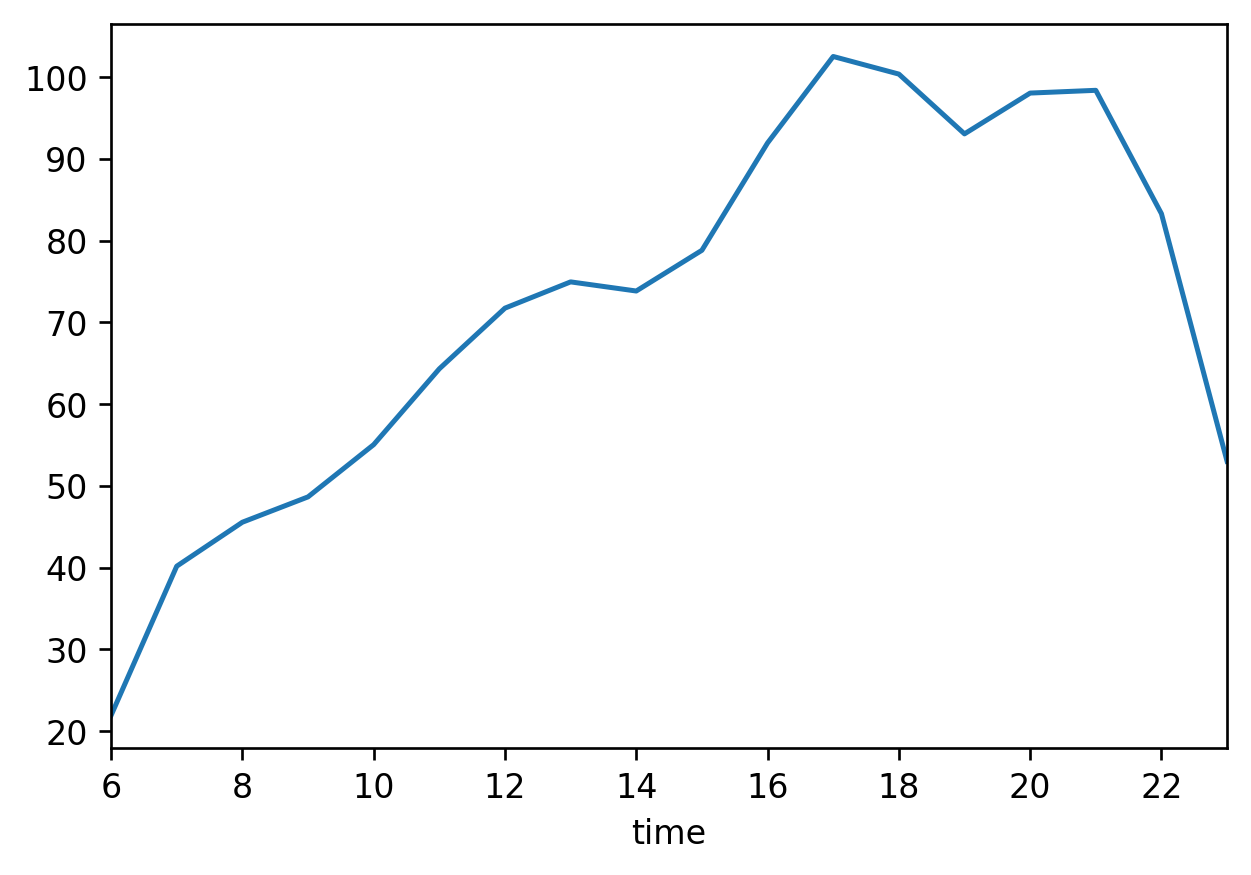

In [16]:
# Make an axis on which to plot

fig, ax = plt.subplots(dpi=120)

wr_times.unstack().wr_mean.plot(ax=ax)

You can also specify which columns and which kind of plot you'd like to make.

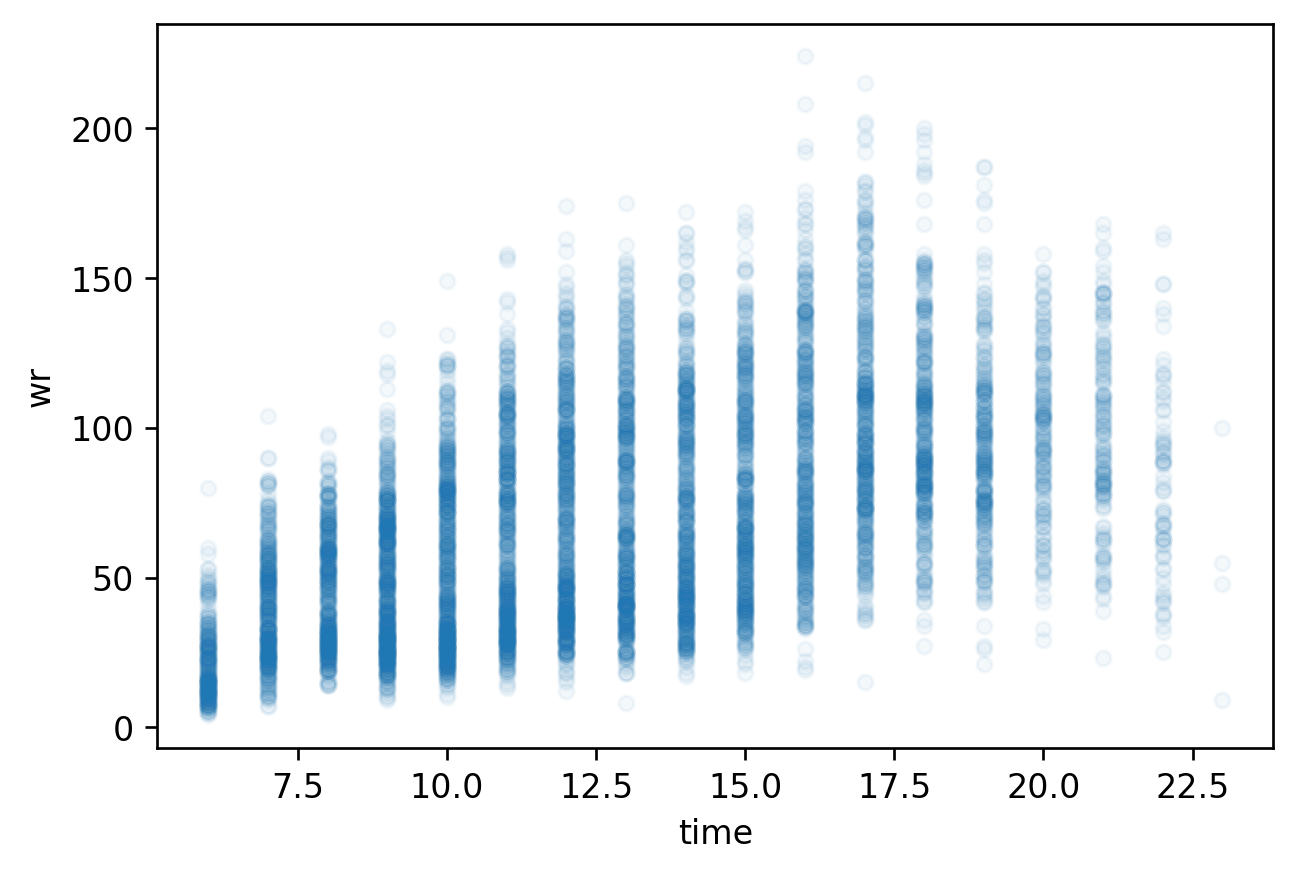

In [17]:
fig, ax = plt.subplots(dpi=120)

df.plot(ax=ax, kind='scatter', x='time', y='wr', alpha = 0.05)

If you are already familiar with matplotlib, you can use the matplotlib API with pandas columns very easily!

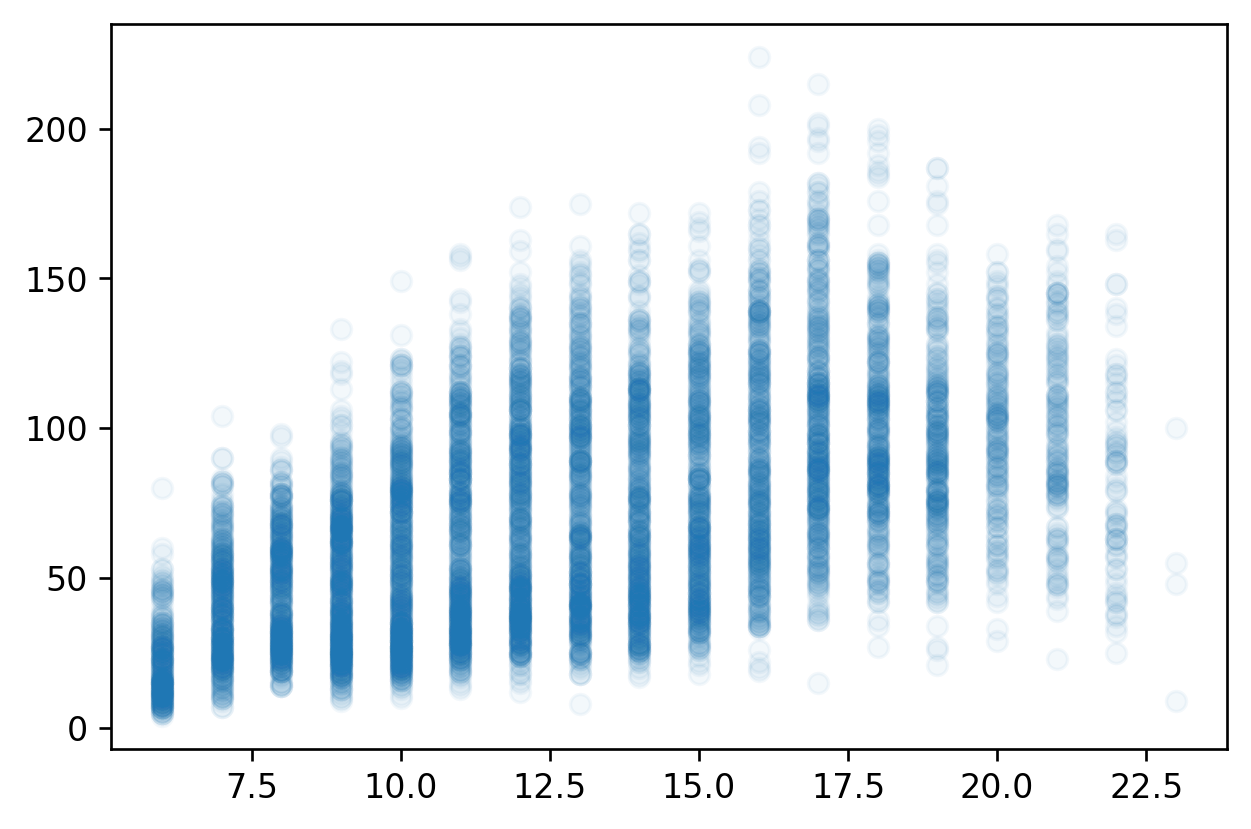

In [18]:
# An equivalent plot using matplotlib
fig, ax = plt.subplots(dpi=120)

plt.scatter(df.time, df.wr, alpha = 0.05)

### Play Time! 

Take some time to investigate the data.  Create some summaries of the data. At the end, we can share what we've learned about the gym!

Now you know how to...

* Select new columns
* Filter rows and group by rows
* Make summaries of the data
* Plot your summaries.

Show me what you've learned!

Questions you could try and answer:

* What time do you think the gym opens and closes in the summer?  Find which hours are measured in the winter and fall but not measured in the summer.

* Plot mean gym activity by month

* How many more people on average go to the gym in January than in February?  This might be the effect of new years resolutions.

* Between what hours is the gym the busiest?

### Here is My Attempt

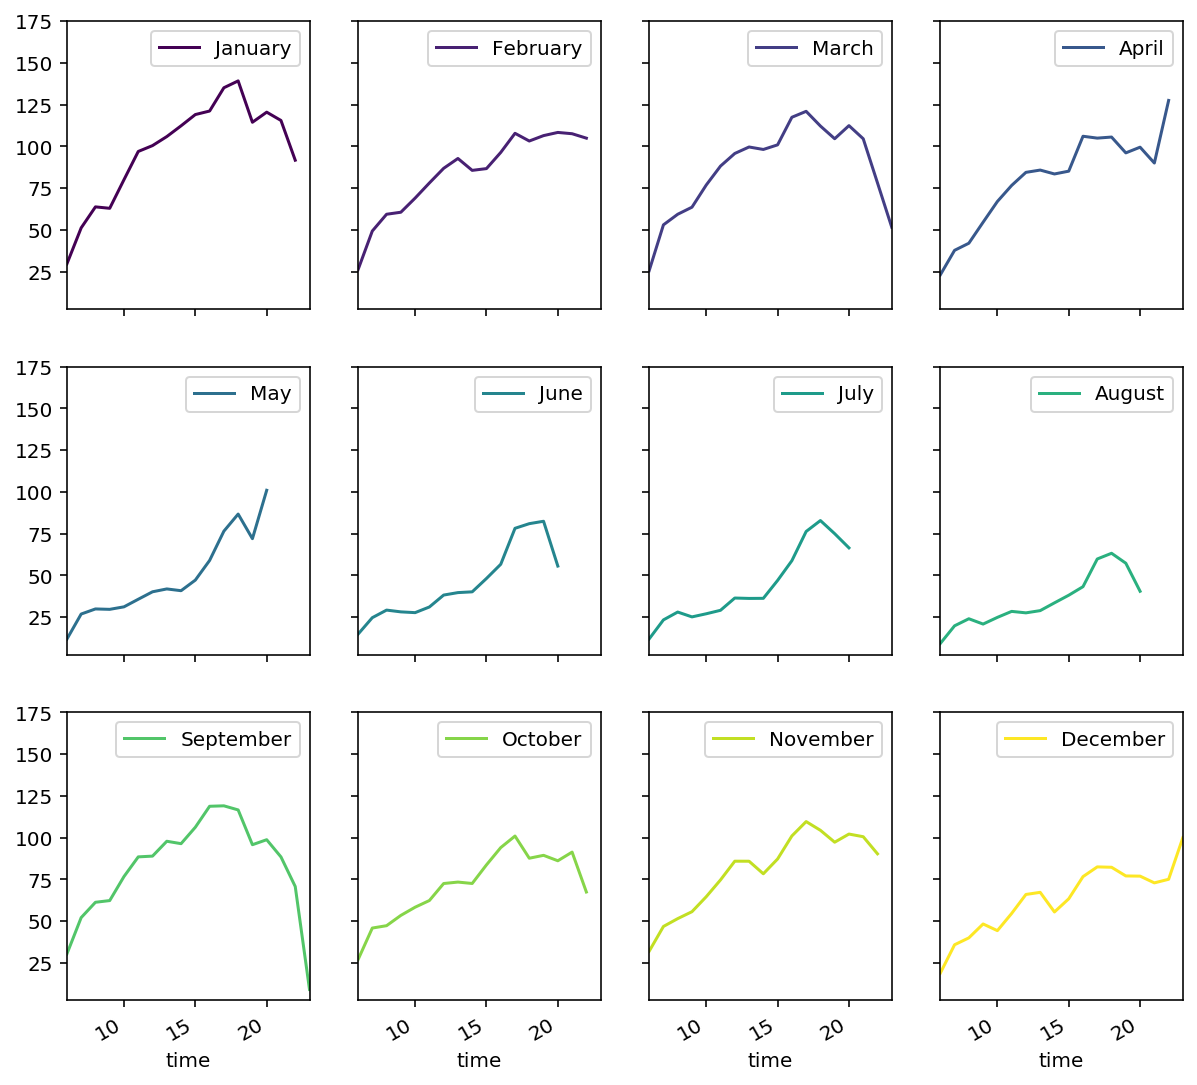

In [19]:
#Arange the plots nicely

month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

#Make a copy of the dataframe so I don't mess up the original data
dfc = df.copy()

# Turn the month column into a Categorical type column.
# This data type has some special properties, namely that we can tell pandas that they have
# a specific order.  The order is given by the month_order variable.
# Assign the month column to be something different
dfc['month'] = pd.Categorical(df.month, categories=month_order, ordered=True)


# But it all together now!
grouped_df = (
    dfc. #Take my data
    groupby(['time','month']). #Group by time of day and month
    wr.mean(). #Compute the mean wr value per month
    unstack() #re-arrange the data so that each month is a new column.
)


ax=grouped_df.plot(cmap = 'viridis', #Determine the color pallete I want to use
                subplots = True, #Force pandas to plot the data on a grid by column
                layout = (3,4), #Tell pandas I want a 3x4 grid
                figsize=(10,10), #I want the figure to be 10 inches by 10 inches (this is not to scale)
                sharey = True, #I want all the plots to have the same y axis scale
                sharex = True); #I want all the plots to have the same x axis scale


for axis in ax.ravel():
    axis.set_ylim(None, 175)
    axis.legend(loc='upper right')

In [20]:
grouped_df

month,January,February,March,April,May,June,July,August,September,October,November,December
time,,,,,,,,,,,,
6,29.583333,26.090909,25.521739,23.000000,11.826087,14.791667,11.956522,9.214286,30.272727,26.833333,31.892857,18.750000
7,51.157895,49.272727,52.972973,37.708333,26.870968,24.689655,23.357143,19.809524,52.041667,45.783784,46.742857,35.772727
8,63.744186,59.323529,59.314286,41.958333,29.916667,29.228571,28.058824,24.038462,61.225806,47.205882,51.432432,39.904762
9,62.888889,60.531915,63.555556,54.551724,29.678571,28.166667,25.156250,20.862069,62.244898,53.363636,55.586957,48.230769
10,80.033898,69.000000,76.836735,66.964286,31.183673,27.701754,27.025000,24.862069,76.642857,58.272727,64.560976,44.238095
11,96.933333,78.062500,88.180000,76.583333,35.722222,31.090909,29.108108,28.454545,88.421053,62.275000,74.627907,54.536585
12,100.450000,86.836364,95.735849,84.419355,40.191489,38.229167,36.452381,27.576923,88.875000,72.462963,85.836735,65.906250
13,105.854167,92.734694,99.612245,85.787879,41.902439,39.704545,36.218750,28.909091,97.775510,73.326923,85.813953,67.176471
14,112.298246,85.608696,98.133333,83.454545,40.846154,40.166667,36.272727,33.566667,96.333333,72.484848,78.294118,55.419355


(-0.5, 7.5)

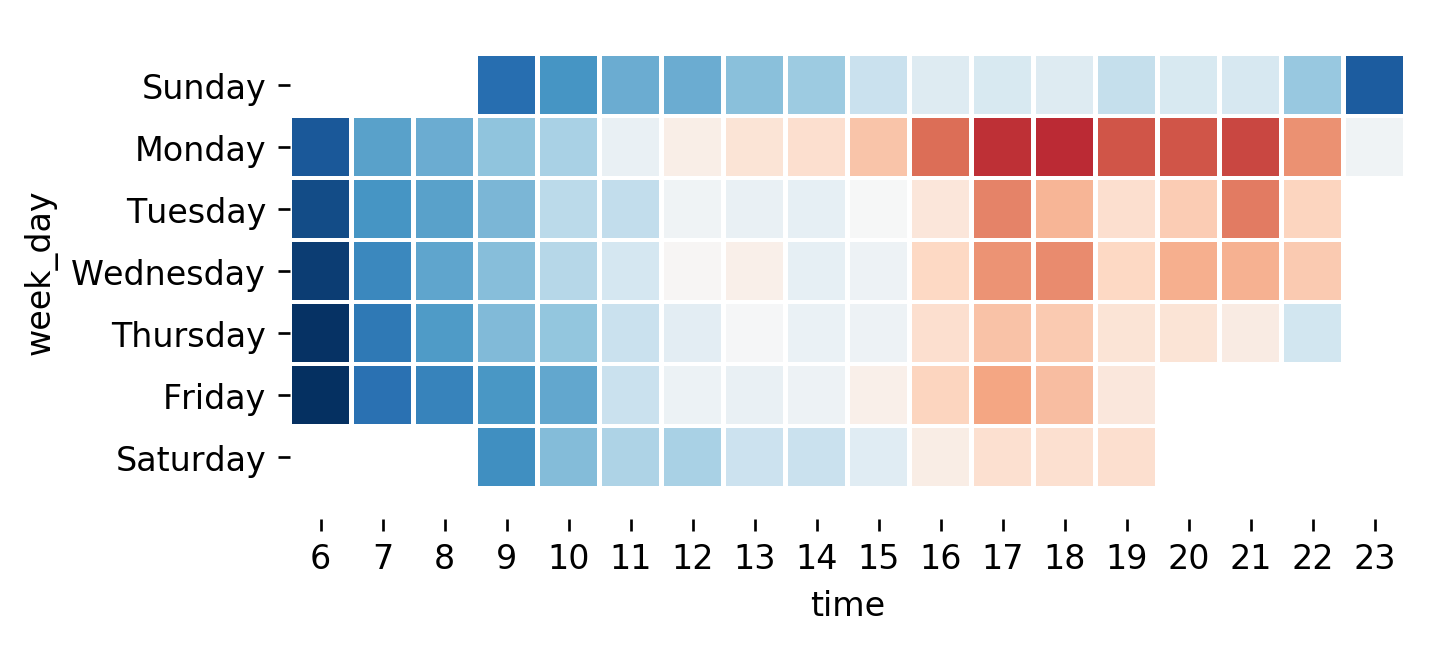

In [73]:
import seaborn as sns

day_of_week = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
df['week_day']  = pd.Categorical(df.week_day, categories=day_of_week[::-1], ordered=True)
grouped_df = df.groupby(['time','week_day']).wr.mean()



fig, ax = plt.subplots(dpi=120)
ax = sns.heatmap(grouped_df.unstack().T, 
            square = True, 
            cbar = False,
           linewidths=1,
           center=80,
           cmap='RdBu_r',
           ax = ax)

ax.set_ylim(-0.5, 7.5)